## Analisis Data Text

In [1]:
!python -m pip install --upgrade pip

In [2]:
!pip install nltk

NLTK adalah singkatan dari Natural Language Tool Kit, yaitu sebuah library yang digunakan untuk membantu pemrosesan data teks, yang mana ibrary ini memudahkan untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning. 

sehingga pada kode ini adalah perintah menginstal pustaka Python bernama NLTK (Natural Language Toolkit).

In [3]:
!pip install wordcloud

WordCloud adalah library yang berguna untuk membuat representasi visual dari kumpulan kata-kata (teks) di mana ukuran kata-kata tersebut menunjukkan seberapa sering kata-kata tersebut muncul dalam teks. Pada kode ini menunjukkan perintah pengunduhan WordCloud untuk memberikan visualisasi tentang kata-kata yang paling sering muncul dalam suatu teks.

In [90]:
!pip install PySastrawi

     -------------------------------------- 210.6/210.6 kB 3.2 MB/s eta 0:00:00


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
from indoNLP.preprocessing import replace_slang

ModuleNotFoundError: No module named 'Sastrawi.tokenization'

# Prepareration Data

In [7]:
data1 = pd.read_csv("C:/Users/hp/Downloads/uji data.csv")
data1

,Timestamp,Email Address,Email,Nama Lengkap,"Umur ( hanya angka saja, misal : 19)",Jenis Kelamin,Jurusan,NPM,Aplikasi media sosial apa yang sering anda gunakan dalam sehari?,Dimana anda biasa menggunakan sosial media?,...,B8,B9,B10,Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? Setuju atau tidak setuju mohon diberikan alasannya.,C1,C2,C3,C4,C5,Apakah dalam penggunaan media sosial memiliki dampak negatif atau positif terhadap kesehatan mental ada semenjak anda bermain media sosial hingga saat ini? Tuliskan salah satu faktornya dan beri alasannya.
0,12/8/2023 20:50:08,23043010228@student.upnjatim.ac.id,23043010228@student.upnjatim.ac.id,Dhimas Adiguna,19,Laki - laki,Ilmu Komunikasi,23043010228,Tiktok,Di rumah,...,2,2,2,setuju karena sosial media sekarang bukan hany...,2,4,3,1,2,positif karena di sosial media saya dapat mene...
1,12/8/2023 20:56:48,kurniawanzabdi@gmail.com,kurniawanzabdi@gmail.com,Zabdi Kurniawan Suprayogi,19,Laki - laki,Ilmu Komunikasi,22043010321,Instagram,Di rumah,...,2,2,3,pribadi dan anggapan setiap individu adalah be...,2,2,2,3,2,semua kegiatan dan hal pasti memiliki dampak p...
2,12/8/2023 21:00:26,kemalrezap@gmail.com,kemalrezap@gmail.com,Kemal Reza P,20,Laki - laki,Ilmu Komunikasi,22043010080,Tiktok,Di rumah,...,2,2,3,Setuju karena Lingkungan dalam media sosial ya...,4,4,3,2,2,Penggunaan media sosial bisa memiliki dampak y...
3,12/8/2023 22:12:16,22043010177@student.upnjatim.ac.id,22043010177@student.upnjatim.ac.id,Fani Septi P. W.,21,Perempuan,Ilmu Komunikasi,22043010177,Instagram,Di rumah,...,3,2,3,"Kutang setuju, karena menurut saya lingkungan ...",3,3,2,3,2,Yang namanya social media pasti memiliki dampa...
4,12/8/2023 22:16:14,23043010057@student.upnjatim.ac.id,23043010057@student.upnjatim.ac.id,ALYADITA NORA HALIZA,18,Perempuan,ILMU KOMUNIKASI,23043010057,Tiktok,Di rumah,...,4,3,3,"TIDAK, hal ini tergantung terhadap setiap indi...",4,2,2,2,1,Penggunaan media sosial dapat memberikan dampa...
5,12/8/2023 23:17:14,23043010175@student.upnjatim.ac.id,23043010175@student.upnjatim.ac.id,Amanda Lutfia Adi Kusuma,18,Perempuan,Ilmu Komunikasi,23043010175,Instagram,Di rumah,...,2,3,3,Kebanyakan kejadian saat ini memang social med...,2,4,3,2,2,Dampak positif dari bersosial media atau aktif...
6,12/9/2023 2:17:40,21043010038@student.upnjatim.ac.id,21043010038@student.upnjatim.ac.id,Nanda Mirrotul Waliidah,19,Perempuan,Ilmu Komunikasi,21043010038,Instagram,Di rumah,...,2,4,2,"Tidak setuju, karena cara kita bermedia sosial...",3,3,3,2,3,"Selama saya menggunakan medsos, saya telah mer..."
7,12/9/2023 8:09:23,22043010032@student.upnjatim.ac.id,22043010032@student.upnjatim.ac.id,Shafinaz Nafizhah Hardianti,20,Perempuan,Ilmu Komunikasi,22043010032,X,Di rumah,...,4,1,4,Saya tidak setuju. Menurut saya lingkungan med...,2,3,1,4,3,dalam penggunaan media yang saya gunakan ada d...
8,12/9/2023 8:45:04,23043010197@student.upnjatim.ac.id,23043010197@student.upnjatim.ac.id,Daffa pasha arifin,17,Laki - laki,Ilmu Komunikasi,23043010197,Instagram,Di rumah,...,3,4,3,"Untuk saya sendiri, tidak ya dikarenakan saya ...",2,3,3,2,2,"Untuk sisi positifnya ya, saya bisa berteman d..."
9,12/9/2023 9:43:06,najwaadysta@gmail.com,najwaadysta@gmail.com,Adysta Najwa Sabrina Haya Kamila,18,Perempuan,Ilmu Komunikasi,23043010116,Instagram,Di rumah,...,4,4,2,"Tidak setuju. Menurut saya, lingkungan dalam m...",2,4,2,2,1,Impact positif yang saya dapatkan adalah motiv...


Memanggil data hasil scrapping sebelumnya, yang mana hanya menampilkan 3 list terakhir dalam data. Setelah melakukan scraping di dapatkan jumlah data sebanyak 58 baris dan 39 kolom

In [8]:
data2 = data1.drop(columns = (['Email Address','Dimana anda biasa menggunakan sosial media?','Timestamp', 'Email', 'Nama Lengkap', 'Umur ( hanya angka saja, misal : 19)', 'Jenis Kelamin', 'Jurusan', 'NPM', 'Aplikasi media sosial apa yang sering anda gunakan dalam sehari?','Dengan apa anda mengakses sosial media?', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'C1', 'C2', 'C3', 'C4', 'C5']))
data2

,Apa pendapat anda mengenai kebijakan pemerintah yang telah menutup Tiktok Shop ? Setuju atau tidak setuju mohon diberikan alasannya.,Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? Setuju atau tidak setuju mohon diberikan alasannya.,Apakah dalam penggunaan media sosial memiliki dampak negatif atau positif terhadap kesehatan mental ada semenjak anda bermain media sosial hingga saat ini? Tuliskan salah satu faktornya dan beri alasannya.
0,tidak setuju karena menutup tiktok shop juga s...,setuju karena sosial media sekarang bukan hany...,positif karena di sosial media saya dapat mene...
1,karena terlalu banyak platform media sosial ya...,pribadi dan anggapan setiap individu adalah be...,semua kegiatan dan hal pasti memiliki dampak p...
2,Tidak setuju karena dengan adanya Tiktok Shop ...,Setuju karena Lingkungan dalam media sosial ya...,Penggunaan media sosial bisa memiliki dampak y...
3,Kurang setuju dengan pemblokiran terhadap tikt...,"Kutang setuju, karena menurut saya lingkungan ...",Yang namanya social media pasti memiliki dampa...
4,"Setuju, karena tiktok shop menggunakan data pr...","TIDAK, hal ini tergantung terhadap setiap indi...",Penggunaan media sosial dapat memberikan dampa...
5,Sebenarnya antara setuju dan tidak setuju kare...,Kebanyakan kejadian saat ini memang social med...,Dampak positif dari bersosial media atau aktif...
6,"Saya pribadi kurang setuju, karena berdasarkan...","Tidak setuju, karena cara kita bermedia sosial...","Selama saya menggunakan medsos, saya telah mer..."
7,Menurut saya dengan menutup tiktok shop itu se...,Saya tidak setuju. Menurut saya lingkungan med...,dalam penggunaan media yang saya gunakan ada d...
8,"Tidak setuju, alasannya sangat simpel, ini sud...","Untuk saya sendiri, tidak ya dikarenakan saya ...","Untuk sisi positifnya ya, saya bisa berteman d..."
9,Saya tidak setuju jika saya adalah konsumen da...,"Tidak setuju. Menurut saya, lingkungan dalam m...",Impact positif yang saya dapatkan adalah motiv...


Penghapusan beberapa kolom yang tidak dibutuhkan, seperti Email, Nama Lengkap, Umur, Jenis Kelamin, Jurusan, NPM, dan lain - lain. Dimana ini bertujuan untuk menyederhanakan struktur DataFrame atau jika kolom-kolom tersebut tidak diperlukan untuk analisis teks ini.

In [9]:
data3 = data2.rename(columns={'Apa pendapat anda mengenai kebijakan pemerintah yang telah menutup Tiktok Shop ? Setuju atau tidak setuju mohon diberikan alasannya.': 'A', 'Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? Setuju atau tidak setuju mohon diberikan alasannya.': 'B', 'Apakah dalam penggunaan media sosial memiliki dampak negatif atau positif terhadap kesehatan mental ada semenjak anda bermain media sosial hingga saat ini? Tuliskan salah satu faktornya dan beri alasannya.' :'C'})
data3

,A,B,C
0,tidak setuju karena menutup tiktok shop juga s...,setuju karena sosial media sekarang bukan hany...,positif karena di sosial media saya dapat mene...
1,karena terlalu banyak platform media sosial ya...,pribadi dan anggapan setiap individu adalah be...,semua kegiatan dan hal pasti memiliki dampak p...
2,Tidak setuju karena dengan adanya Tiktok Shop ...,Setuju karena Lingkungan dalam media sosial ya...,Penggunaan media sosial bisa memiliki dampak y...
3,Kurang setuju dengan pemblokiran terhadap tikt...,"Kutang setuju, karena menurut saya lingkungan ...",Yang namanya social media pasti memiliki dampa...
4,"Setuju, karena tiktok shop menggunakan data pr...","TIDAK, hal ini tergantung terhadap setiap indi...",Penggunaan media sosial dapat memberikan dampa...
5,Sebenarnya antara setuju dan tidak setuju kare...,Kebanyakan kejadian saat ini memang social med...,Dampak positif dari bersosial media atau aktif...
6,"Saya pribadi kurang setuju, karena berdasarkan...","Tidak setuju, karena cara kita bermedia sosial...","Selama saya menggunakan medsos, saya telah mer..."
7,Menurut saya dengan menutup tiktok shop itu se...,Saya tidak setuju. Menurut saya lingkungan med...,dalam penggunaan media yang saya gunakan ada d...
8,"Tidak setuju, alasannya sangat simpel, ini sud...","Untuk saya sendiri, tidak ya dikarenakan saya ...","Untuk sisi positifnya ya, saya bisa berteman d..."
9,Saya tidak setuju jika saya adalah konsumen da...,"Tidak setuju. Menurut saya, lingkungan dalam m...",Impact positif yang saya dapatkan adalah motiv...


Mengganti kolom pertanyaan dengan variabel A, B, dan C guna memudahkan dalam melakukan Analisis Data Text

In [10]:
reviews_data = data3.drop(columns=['A', 'B'])
reviews_data

,C
0,positif karena di sosial media saya dapat mene...
1,semua kegiatan dan hal pasti memiliki dampak p...
2,Penggunaan media sosial bisa memiliki dampak y...
3,Yang namanya social media pasti memiliki dampa...
4,Penggunaan media sosial dapat memberikan dampa...
5,Dampak positif dari bersosial media atau aktif...
6,"Selama saya menggunakan medsos, saya telah mer..."
7,dalam penggunaan media yang saya gunakan ada d...
8,"Untuk sisi positifnya ya, saya bisa berteman d..."
9,Impact positif yang saya dapatkan adalah motiv...


Menghapus kolom A dan B karena kami hanya akan melakukan Analisis data teks menggunakan Variabel C yaitu dampak penggunaan sosial media terhadap kesehatan mental mahasiswa Ilmu Komunikasi UPNVJT

In [11]:
reviews_data.head()

,C
0,positif karena di sosial media saya dapat mene...
1,semua kegiatan dan hal pasti memiliki dampak p...
2,Penggunaan media sosial bisa memiliki dampak y...
3,Yang namanya social media pasti memiliki dampa...
4,Penggunaan media sosial dapat memberikan dampa...


Menampilkan 5 baris pertama dengan metode .head() yang ana data ini merupakan data baru hasil dari penghapusan bebetapa kolom sebelumnya yang menyisakan 1 kolom saja

In [12]:
reviews_data.shape

(55, 1)

Memeriksa jumlah kolom dan baris, yang terdapat 55 baris dan 1 kolom

In [13]:
missing_values = reviews_data.isnull().sum()
print(missing_values)

C    0
dtype: int64


In [14]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C       55 non-null     object
dtypes: object(1)
memory usage: 568.0+ bytes


* **Perluasan Kontraksi**

In [15]:
reviews_data['no_contractions'] = reviews_data['C'].apply(lambda x: [contractions.fix(word) for word in x.split()])
reviews_data.head()

,C,no_contractions
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap..."
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d..."
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da..."
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki..."
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,..."


Melakukan perluasan contractions (kontraksi) dengan menambahkan kolom baru yang menangpung isi dari kolom content tetapi dalam bentuk per kata yang diperluas ke bentuk aslinya. 

Menggunakan fungsi lambda untuk mengamnil teks dari kolom 'C' lalu membagi per kata menggunakan 'c.split()' dan library contractions sendiri untuk menampilkan ersi singkat dari sebuah kata. Sehingga di dapatkan bentuk asli (per kata) dari kalimat atau teks dalma kolom content

* **Menghapus Tanda Baca**

In [16]:
reviews_data['reviews_no_contractions'] = [' '.join(l) for l in reviews_data['no_contractions']]
reviews_data.head()

,C,no_contractions,reviews_no_contractions
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...",Penggunaan media sosial bisa memiliki dampak y...
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...",Yang namanya social media pasti memiliki dampa...
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...",Penggunaan media sosial dapat memberikan dampa...


Jika sebelumnya tiap kata pada kolom no_contractions dipisahkan menggunakan, maka kali ini melakukan penambahan kolom baru yang berisikan teks pada no_contractions tetapi dengan versi per katanya di pidahkan oleh spasi dengan kata lain dilakukan pula penghilangan tanda baca karena  tanda baca tidak diperlukan untuk analisis teks dan tidak menyampaikan makna yang signifikan. Sehingga di dapatkan  kolom baru ('reviews_no_contractions') yang berisi teks dari kolom 'no_contractions', tetapi setiap kata di dalamnya dipisahkan oleh spasi dengan hanya menampilkan 7 baris data teratas.

* **Melakukan tokenisasi**

Tokenisasi melibatkan pemecahan teks menjadi lebih kecil potongan, misalnya kata atau frasa.

In [17]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_no_contractions'].apply(word_tokenize)
reviews_data.head()

,C,no_contractions,reviews_no_contractions,reviews_tokenized
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap..."
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d..."
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...",Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da..."
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...",Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki..."
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...",Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,..."


Memperbarui DAtaFrame dengan menambahkan kolom baru  ('reviews_tokenized') yang berisi ulasan dari kolom 'reviews_no_contractions', tetapi setiap ulasan dipecah menjadi token (kata-kata). Untuk mengubah kata menjadi token atau list kata ini menggunkan fungsi 'word_tokenize' yang dibantu dengan metode apply. Step ini berguna untuk analisis lebih lanjut, seperti penghitungan frekuensi kata atau analisis sentimen.

* **Konversi ke Huruf Kecil**

In [18]:
reviews_data['reviews_lower'] = reviews_data['reviews_tokenized'].apply(lambda x: [word.lower() for word in x])
reviews_data.head()

,C,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap..."
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d..."
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...",Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da..."
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...",Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki..."
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...",Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,..."


Membuat kolom baru 'reviews_lower' dimana berisi teks dari kolom 'reviews_tokenized' yang sudah distandarisasi, sehingga setiap kata di dalamnya diubah menjadi huruf kecil (lowercase) menggunakan fungsi lambda yang diterapkan pada setiap daftar kata-kata (token). 


* **Menghapus tanda baca dalam kolom reviews_lower**

In [19]:
punctuations = string.punctuation
reviews_data['reviews_no_punctuation'] = reviews_data['reviews_lower'].apply(lambda x: [word for word in x if word not in punctuations])
reviews_data.head()

,C,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap..."
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d..."
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...",Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da..."
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...",Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki..."
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...",Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,..."


Membuat kolom baru 'reviews_no_punctuation' yang berisi teks dari kolom 'reviews_lower', tetapi setiap kata di dalamnya tidak mengandung tanda baca.Jadi yang ada dalam kolom tersebut adalah daftar kata-kata saja tanpa atau yang tidak termasuk tanda baca, hal ini dilakukan untuk  membersihkan teks dan fokus pada konten kata-kata.

* **Konversi menjadi string**

In [20]:
reviews_data['reviews_cleaned'] = [' '.join(l) for l in reviews_data['reviews_no_punctuation']]
reviews_data.head()

,C,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...",Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da...",penggunaan media sosial bisa memiliki dampak y...
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...",Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki...",yang namanya social media pasti memiliki dampa...
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...",Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,...",penggunaan media sosial dapat memberikan dampa...


Kolom baru (reviews_cleaned) dibuat yang berisi teks dari kolom 'reviews_no_punctuation', yang mana setiap teks telah dibersihkan dari tanda baca dan kata-kata yang tidak diinginkan .Dimana semula pada kolom 'no_punctuations' masih diperluas dengan bentuk list diubah menjadi bentuk string atau teks lengkap. Jadi kolom ini berisi teks yang lengkap setelah proses preparation data sebelumnya

In [21]:
reviews_data[['C','reviews_cleaned']].to_csv('C:/Users/hp/Downloads/cleaned_reviews_data.csv',index = False)

Dari semua proses preparation hanya diambil 3 kolom saja untuk membentuk DataFrame baru dalm bentuk CSV dengan kolom 'content','score','reviews_cleaned' dimana data ini yang akan dugunakan sebagai dataset untuk pross analisis lebih lanjut.

## Dealing With Stop Words
on, now, was, dst. Digunakan agar mereview secara relevan dan harus ditonjolkan, apakah kebanyakan review menyatakan kata sifat yang mempengaruhi data tersebut. misal di sebuah aplikasi, ,maka kata yang sering muncul seperti promonya banyak, aplikasinya lemot, error, lancar, mudah enak,dll. Agar kita mendapat insight yang lebih relevan 

In [22]:
Reviews_data = pd.read_csv('C:/Users/hp/Downloads/cleaned_reviews_data.csv')
Reviews_data.head()

,C,reviews_cleaned
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...


In [23]:
Reviews_data.shape

(55, 2)

**1. Tokenisasi Data**

In [24]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned'].apply(word_tokenize)

**2. Menggabungkan semua kata yang sudah di tokensisasi dalam list**

In [25]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

**3. Menghitung frekuensi tiap kata**

In [26]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
           
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

**4. Membuat list semua kata yang sudah di tokenisasi**

In [27]:
reviews = reviews_data['reviews_tokenized']
reviews_words = combine_words(reviews)
reviews_words[:10]
['positif', 'karena', 'di', 'sosial', 'media', 'saya', 'dapat', 'menemukan', 'sebuah', 'hiburan', 'yang', 'bisa', 'membangkitkan', 'semangat', 'atau', 'merubah', 'mood', 'saya', 'menjadi', 'lebih', 'baik',
'semua', 'kegiatan', 'dan', 'hal', 'pasti', 'memiliki', 'dampak', 'positif', 'dan', 'negatif', 'nya', 'bagaimana', 'kita', 'menggunakannya', 'dengan', 'bijak',
 'tergantung', 'dari', 'dari', 'interaksinya', 'dan', 'tergantung', 'pada', 'individu', 'dalam', 'mengelola', 'interaksinya', 'tersebut.', 'Jika', 'tidak', 'bisa', 'mengelola', 'interaksi', 'media', 'sosial', 'maka', 'akan', 'menggangu', 'kesehatannya', 'terutama', 'mental', 'seperti', 'stres', 'dan', 'cemas',
'yang', 'namanya', 'social', 'media', 'pasti', 'memiliki', 'dampak', 'baik', 'positif', 'maupun', 'negatif', 'dampak', 'positif', 'yang', 'aku', 'rasakan', 'adalah', 'tersedianya', 'media', 'hiburan', 'dan', 'informasi', 'yang', 'sesuai', 'dengan', 'apa', 'yang', 'aku', 'butuh', 'dan', 'inginkan', 'terlebih', 'adanya', 'alogaritma', 'yang', 'akan', 'mempermudah', 'mendapatkan', 'konten', 'sesuai', 'minatku', 'untuk', 'dampak', 'negatif', 'adalah', 'banyak', 'aku', 'temui', 'pada', 'kolom', 'komentar', 'yang', 'mengandung', 'ujaran', 'kebencian', 'selain', 'itu', 'juga', 'terdapat', 'konten', 'yang', 'menyebarluaskan', 'informasi', 'yang', 'belum', 'tentu', 'kebenarannya', 'hingga', 'menggiring', 'opini', 'publik',
'positif', 'karena', 'dalam', 'beberapa', 'waktu', 'saya', 'mendapatkan', 'dukungan', 'dan', 'afirmasi', 'positif', 'dari', 'sosial', 'media', 'yang', 'membuat', 'kondisi', 'mental', 'saya', 'lebih', 'baik']

['positif',
 'karena',
 'di',
 'sosial',
 'media',
 'saya',
 'dapat',
 'menemukan',
 'sebuah',
 'hiburan',
 'yang',
 'bisa',
 'membangkitkan',
 'semangat',
 'atau',
 'merubah',
 'mood',
 'saya',
 'menjadi',
 'lebih',
 'baik',
 'semua',
 'kegiatan',
 'dan',
 'hal',
 'pasti',
 'memiliki',
 'dampak',
 'positif',
 'dan',
 'negatif',
 'nya',
 'bagaimana',
 'kita',
 'menggunakannya',
 'dengan',
 'bijak',
 'tergantung',
 'dari',
 'dari',
 'interaksinya',
 'dan',
 'tergantung',
 'pada',
 'individu',
 'dalam',
 'mengelola',
 'interaksinya',
 'tersebut.',
 'Jika',
 'tidak',
 'bisa',
 'mengelola',
 'interaksi',
 'media',
 'sosial',
 'maka',
 'akan',
 'menggangu',
 'kesehatannya',
 'terutama',
 'mental',
 'seperti',
 'stres',
 'dan',
 'cemas',
 'yang',
 'namanya',
 'social',
 'media',
 'pasti',
 'memiliki',
 'dampak',
 'baik',
 'positif',
 'maupun',
 'negatif',
 'dampak',
 'positif',
 'yang',
 'aku',
 'rasakan',
 'adalah',
 'tersedianya',
 'media',
 'hiburan',
 'dan',
 'informasi',
 'yang',
 'sesu

**5. Menampilkan DataFrame**

In [28]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
5,saya,109
10,yang,107
4,media,67
3,sosial,59
0,positif,54


Semua step di atas merupakan proses menggabungkan kata-kata dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada step 4. Selanjutnya dengan menggunakan fungsi 'count_topwords' kita dapatt menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasan 5 step di atas ya

**6. Visualisasi topword**

<AxesSubplot:xlabel='words', ylabel='word_count'>

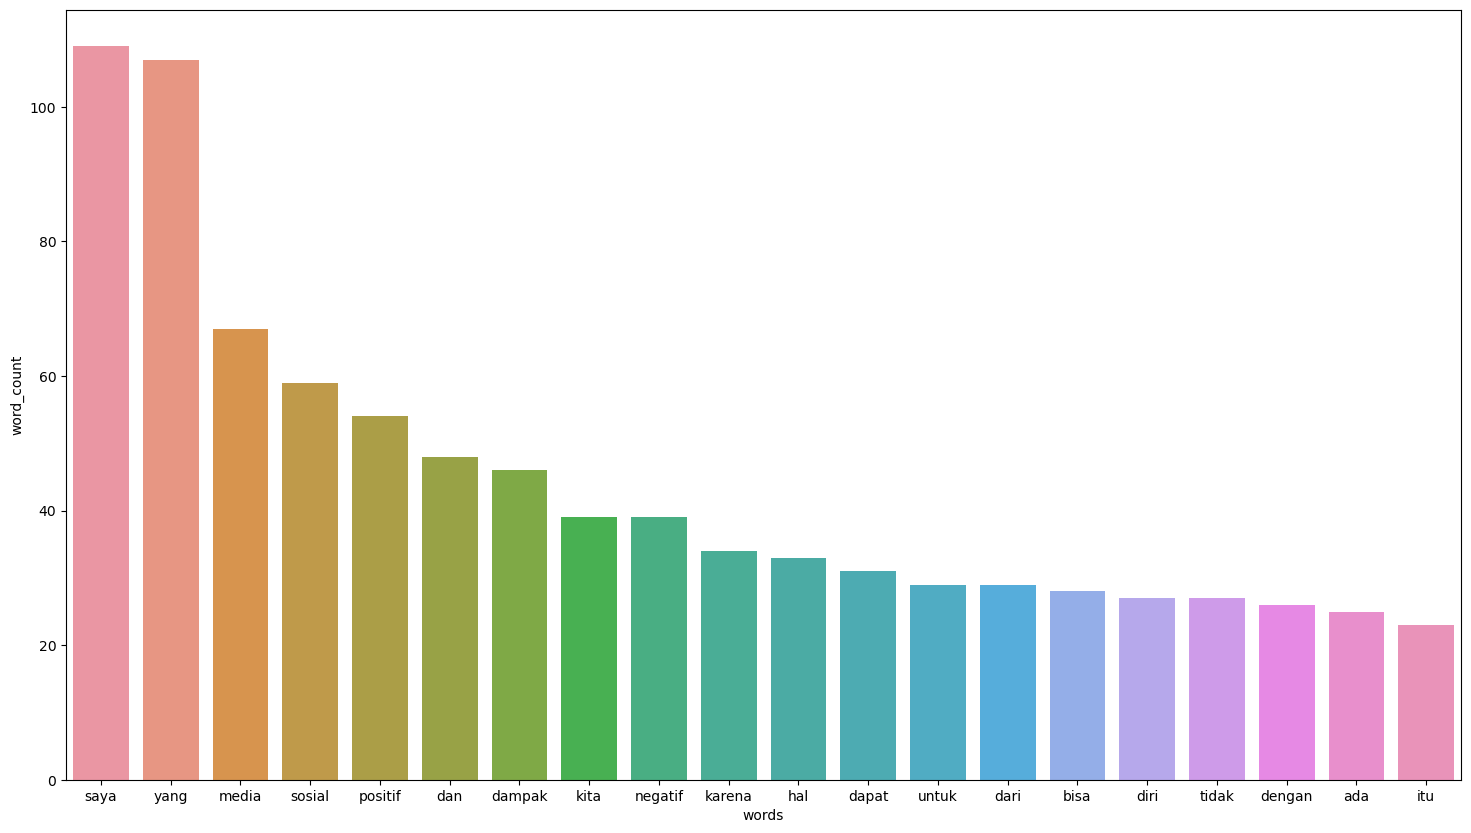

In [29]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan DataFrame sebelumnya dan barplot di atas menunjukkan bahwa kata 'the' menjadi kata yang paling sering muncul yaitu sebanyak 20.109 kali pada semua review, kemudian disusul kata 'not' muncul sebanyak 18.932. Sedangkan kata yang jarang muncul <5000 kali.

**note: ini hasil topword masih include stopword nya**

* **Penghapusan StopWords**

In [30]:
stop_words = set(stopwords.words('Indonesian'))
reviews_data['reviews_no_stopwords'] = reviews_data['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
reviews_data.head()

,C,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned,reviews_no_stopwords
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, sosial, media, menemukan, hiburan, m..."
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[kegiatan, memiliki, dampak, positif, negatif,..."
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...",Penggunaan media sosial bisa memiliki dampak y...,"[penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da...",penggunaan media sosial bisa memiliki dampak y...,"[penggunaan, media, sosial, memiliki, dampak, ..."
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...",Yang namanya social media pasti memiliki dampa...,"[yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki...",yang namanya social media pasti memiliki dampa...,"[namanya, social, media, memiliki, dampak, pos..."
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...",Penggunaan media sosial dapat memberikan dampa...,"[penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,...",penggunaan media sosial dapat memberikan dampa...,"[penggunaan, media, sosial, dampak, positif, k..."


Menambahkan kolom baru yaitu (reviews_no_stopwords) menggunakan  metode aplly dan lambda yang bekerja sama untuk membuat list baru yang mana hanya bukan termasuk stopword yang dimasukkan dalam list baru terbebut. Sehingga kolom baru tersebut berisi teks dari kolom 'reviews_tokenized', dimana setiap teks telah dihilangkan stopword nya.

* **Konversi dari list ke String**

In [31]:
reviews_data['reviews_cleaned_stopwords'] = [' '.join(l) for l in reviews_data['reviews_no_stopwords']]
reviews_data.head()

,C,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned,reviews_no_stopwords,reviews_cleaned_stopwords
0,positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap...","[positif, karena, di, sosial, media, saya, dap...",positif karena di sosial media saya dapat mene...,"[positif, sosial, media, menemukan, hiburan, m...",positif sosial media menemukan hiburan membang...
1,semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d...","[semua, kegiatan, dan, hal, pasti, memiliki, d...",semua kegiatan dan hal pasti memiliki dampak p...,"[kegiatan, memiliki, dampak, positif, negatif,...",kegiatan memiliki dampak positif negatif nya m...
2,Penggunaan media sosial bisa memiliki dampak y...,"[Penggunaan, media, sosial, bisa, memiliki, da...",Penggunaan media sosial bisa memiliki dampak y...,"[penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da...","[penggunaan, media, sosial, bisa, memiliki, da...",penggunaan media sosial bisa memiliki dampak y...,"[penggunaan, media, sosial, memiliki, dampak, ...",penggunaan media sosial memiliki dampak positi...
3,Yang namanya social media pasti memiliki dampa...,"[Yang, namanya, social, media, pasti, memiliki...",Yang namanya social media pasti memiliki dampa...,"[yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki...","[yang, namanya, social, media, pasti, memiliki...",yang namanya social media pasti memiliki dampa...,"[namanya, social, media, memiliki, dampak, pos...",namanya social media memiliki dampak positif n...
4,Penggunaan media sosial dapat memberikan dampa...,"[Penggunaan, media, sosial, dapat, memberikan,...",Penggunaan media sosial dapat memberikan dampa...,"[penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,...","[penggunaan, media, sosial, dapat, memberikan,...",penggunaan media sosial dapat memberikan dampa...,"[penggunaan, media, sosial, dampak, positif, k...",penggunaan media sosial dampak positif kesehat...


Menambahkan kolom baru ('reviews_cleaned_stopwords') dengan melakukan iterasi pada kolom 'reviews_no_stopwords' kemudian semua teks dalam kolom tersebut diubah menjadi string. Sehingga menghasilkan kolom baru yang berisi teks dari kolom 'reviews_no_stopwords' dengan setiap teks telah digabungkan kembali menjadi teks yang lengkap. 

In [32]:
reviews_no_stopwords = reviews_data['reviews_no_stopwords']
reviews_words = combine_words(reviews_no_stopwords)
reviews_words[:10]
['positif', 'sosial', 'media', 'menemukan', 'hiburan', 'membangkitkan', 'semangat', 'merubah', 'mood',
'kegiatan', 'memiliki', 'dampak', 'positif', 'negatif', 'nya', 'menggunakannya', 'bijak',
'Penggunaan', 'media', 'sosial', 'memiliki', 'dampak', 'positif', 'negatif', ',', 'tergantung', 'interaksinya', 'tergantung', 'individu', 'mengelola', 'interaksinya', '.', 'Jika', 'mengelola', 'interaksi', 'media', 'sosial', 'menggangu', 'kesehatannya', 'mental', 'stres', 'cemas',
'Yang', 'namanya', 'social', 'media', 'memiliki', 'dampak', 'positif', 'negatif', '.', 'Dampak', 'positif', 'rasakan', 'tersedianya', 'media', 'hiburan', 'informasi', 'sesuai', 'butuh', 'alogaritma', 'mempermudah', 'konten', 'sesuai', 'minatku', '.', 'Untuk', 'dampak', 'negatif', 'temui', 'kolom', 'komentar', 'mengandung', 'ujaran', 'kebencian', '.', 'Selain', 'konten', 'menyebarluaskan', 'informasi', 'kebenarannya', 'menggiring', 'opini', 'publik', '.']

['positif',
 'sosial',
 'media',
 'menemukan',
 'hiburan',
 'membangkitkan',
 'semangat',
 'merubah',
 'mood',
 'kegiatan',
 'memiliki',
 'dampak',
 'positif',
 'negatif',
 'nya',
 'menggunakannya',
 'bijak',
 'Penggunaan',
 'media',
 'sosial',
 'memiliki',
 'dampak',
 'positif',
 'negatif',
 ',',
 'tergantung',
 'interaksinya',
 'tergantung',
 'individu',
 'mengelola',
 'interaksinya',
 '.',
 'Jika',
 'mengelola',
 'interaksi',
 'media',
 'sosial',
 'menggangu',
 'kesehatannya',
 'mental',
 'stres',
 'cemas',
 'Yang',
 'namanya',
 'social',
 'media',
 'memiliki',
 'dampak',
 'positif',
 'negatif',
 '.',
 'Dampak',
 'positif',
 'rasakan',
 'tersedianya',
 'media',
 'hiburan',
 'informasi',
 'sesuai',
 'butuh',
 'alogaritma',
 'mempermudah',
 'konten',
 'sesuai',
 'minatku',
 '.',
 'Untuk',
 'dampak',
 'negatif',
 'temui',
 'kolom',
 'komentar',
 'mengandung',
 'ujaran',
 'kebencian',
 '.',
 'Selain',
 'konten',
 'menyebarluaskan',
 'informasi',
 'kebenarannya',
 'menggiring',
 'opini',

In [33]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
2,media,67
1,sosial,59
0,positif,54
11,dampak,46
12,negatif,39


Menggabungkan tiap kata di kolom 'reviews_no_stopwords' dalam bentuk list, kemudian tiap kata tersebut dihitung frekuensinya sehingga menampilkan 5 data teratas top word dari data yang sudah dibersihkan stopwordnya.

<AxesSubplot:xlabel='words', ylabel='word_count'>

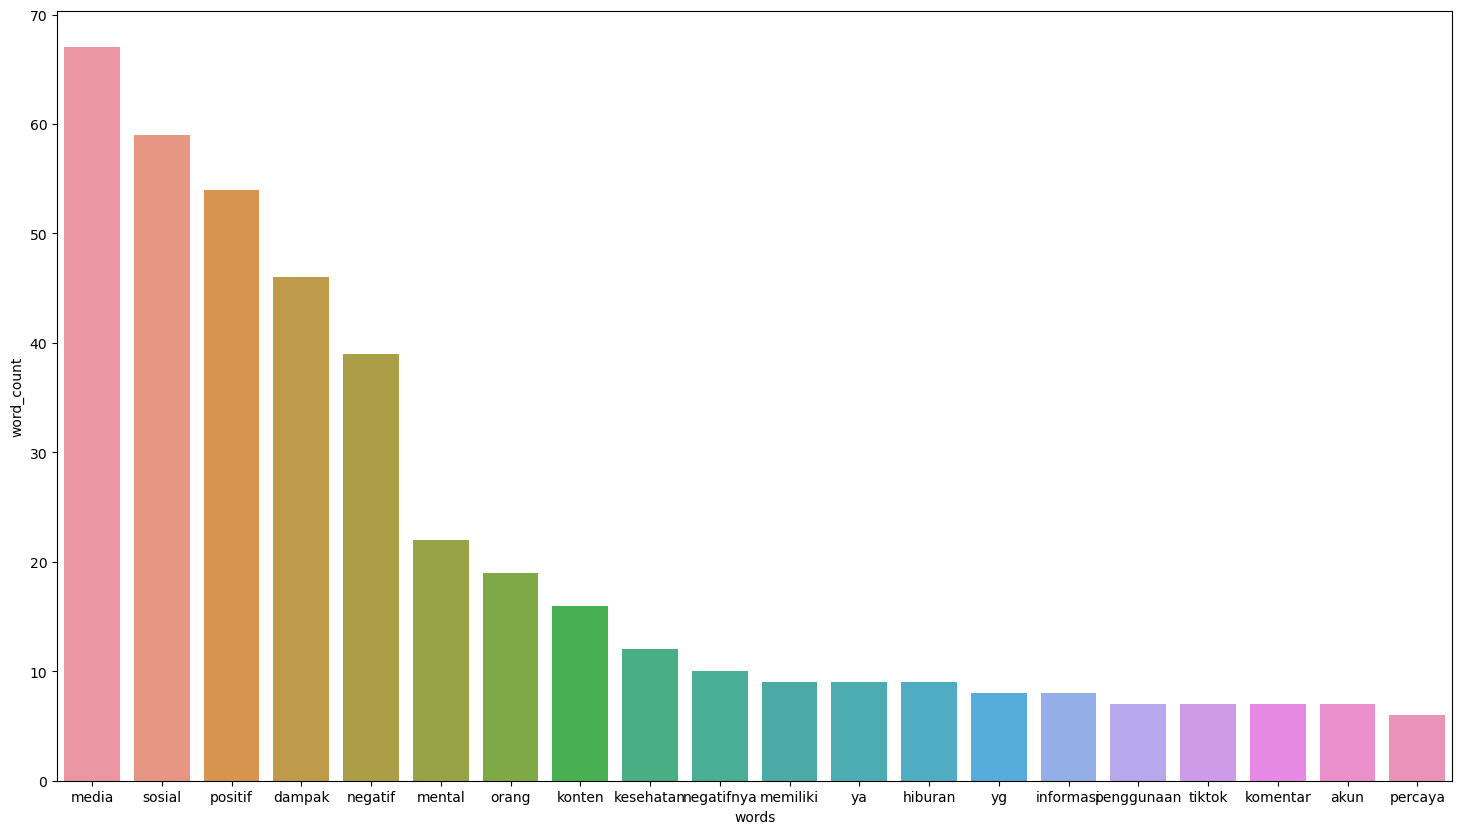

In [34]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan Dataframe dan visualisasi barplot di atas dapat dilihat bahwa kata 'app' menjadi kata yang sering muncul dalam dalam semua review yaitu sebanyak 17.983 kemudian kedua ada kata 'good' sebanyak 7.888. Sedangkan kata yang jarang atau paling sedikit muncul adalah kata 'get' yaitu sebanyak  <2.500 kali

In [35]:
reviews_data[['C',"reviews_cleaned",'reviews_cleaned_stopwords']].to_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv",index = False)

## Analyzing Part Of Speech
Nouns, verbs, adjective, adverb

**1. Panggil, tampilkan, dan periksa jumlah data**


In [36]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")

In [37]:
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...


In [38]:
reviews_data.shape

(55, 3)

**2. Hapus missing value**

In [39]:
reviews_data = reviews_data.dropna()

**3. Melakukan tokenisasi**

seperti sebelumnya yupp (dibuat kolom baru)

In [40]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

**4. Membuat tag part of Speech**

In [41]:
reviews_data['reviews_pos_tags'] = reviews_data['reviews_tokenized'].apply(nltk.tag.pos_tag)
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_pos_tags
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...,"[positif, sosial, media, menemukan, hiburan, m...","[(positif, JJ), (sosial, JJ), (media, NNS), (m..."
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,"[kegiatan, memiliki, dampak, positif, negatif,...","[(kegiatan, NN), (memiliki, NN), (dampak, NN),..."
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...,"[penggunaan, media, sosial, memiliki, dampak, ...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),..."
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...,"[namanya, social, media, memiliki, dampak, pos...","[(namanya, RB), (social, JJ), (media, NNS), (m..."
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...,"[penggunaan, media, sosial, dampak, positif, k...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),..."


Melakukan tag pos ini menggunakan fungsi 'pos_tag' yang mana tag pos sendiri memberikan informasi tentang jenis kata mulai Nouns, verbs, adjective, adverbbenda, dan juga digunakan untuk analisis lebih lanjut terkait struktur gramatikal dan konteks kata dalam review. sehingga dibuat kolom baru yaitu 'reviews_pos_tags' yang memuat tag pos atau tanda pos untuk tiap review yang ada.

**5. Ekstrak kata sifat (adjectives)**

In [42]:
reviews_data['reviews_adjectives'] = reviews_data['reviews_pos_tags'].apply(lambda x: [word for (word, pos_tag) in x if 'JJ' in (word, pos_tag)])

**6. Menggabungkan semua kata yang sudah di tokensisasi dalam list**

In [43]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

**7. Menghitung frekuensi tiap kata**

In [44]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

**8. Membuat list semua kata yang sudah di tokenisasi**

In [45]:
reviews = reviews_data['reviews_adjectives']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['positif',
 'sosial',
 'negatif',
 'nya',
 'penggunaan',
 'sosial',
 'interaksi',
 'sosial',
 'mental',
 'social']

**9. Menampilkan DataFrame**

In [46]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
1,sosial,59
2,negatif,21
6,mental,17
0,positif,8
21,negatifnya,7


Semua step di atas (dari step 5) merupakan proses menggabungkan kata-kata sifat dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada step 8. Selanjutnya dengan menggunakan fungsi 'count_topwords' kita dapat menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasan dari step 5 sampe 9 di atas ya

**10. Visualisasi**

<AxesSubplot:xlabel='words', ylabel='word_count'>

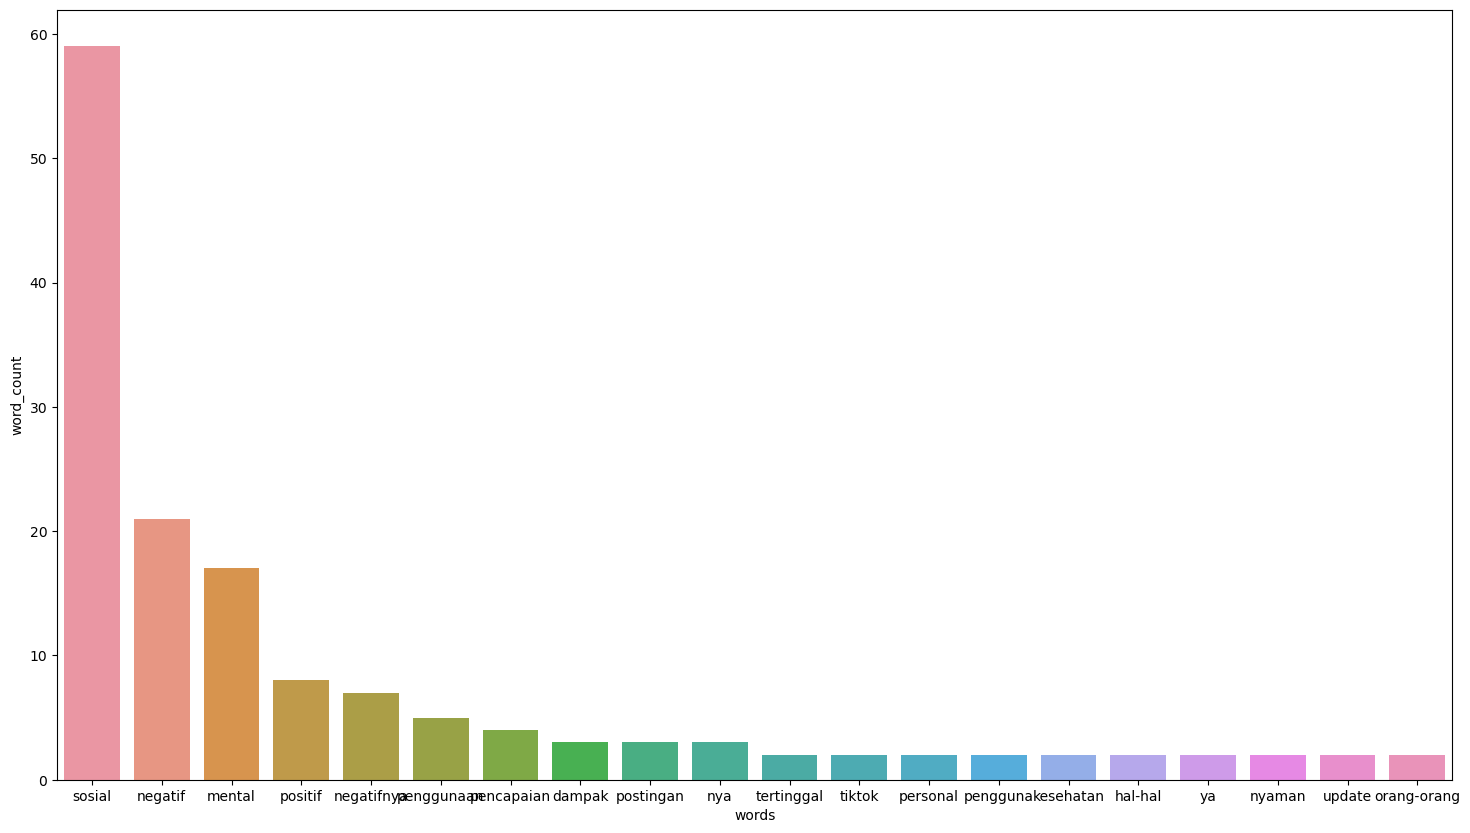

In [47]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan hasil perhitungan frekuensi yang ditampilkan dalam DataFrame lalu divisualisasikan dapat disimpulkan bahwa kata sifat yang sering muncul adalah kata "good" yaitu sebanyak 7.819 kali dan kata sering muncul kedua adalah kata "bad" dengan muncul sebanyak 4.326 kali. Sedangkan kata sifat yang jarang atau sedikit muncul adalah kata "able" sebanyak <1000 kali.

In [48]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")

## Performing Stemming and Lemmatization

Stemming merupakan proses mereduksi kata menjadi akar atau bentuk dasarnya sehingga mampu meningkatkan keakuratan analisis karena beberapa variasi kata yang sama dapat menyebabkan noise dalam
data.

Lemmatization merupakan proses mereduksi kata juga tetapi proses ini mempertimbangkan konteks, jenis ujaran, struktur, dan bagian kata, seperti akar kata, prefiks, dan sufiks, serta konteks kata.

**1. Periksa tipe data dan hapus missing value**

In [49]:
reviews_data.dtypes

C                            object
reviews_cleaned              object
reviews_cleaned_stopwords    object
dtype: object

In [50]:
reviews_data = reviews_data.dropna()

**2. Melakukan tokenisasi**

In [51]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

**3. Melakukan Stemming**

In [52]:
stemmer = nltk.PorterStemmer()
reviews_data['reviews_stemmed_data'] = reviews_data['reviews_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...,"[positif, sosial, media, menemukan, hiburan, m...","[positif, sosial, media, menemukan, hiburan, m..."
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,"[kegiatan, memiliki, dampak, positif, negatif,...","[kegiatan, memiliki, dampak, positif, negatif,..."
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...,"[penggunaan, media, sosial, memiliki, dampak, ...","[penggunaan, media, sosial, memiliki, dampak, ..."
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...,"[namanya, social, media, memiliki, dampak, pos...","[namanya, social, media, memiliki, dampak, pos..."
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...,"[penggunaan, media, sosial, dampak, positif, k...","[penggunaan, media, sosial, dampak, positif, k..."


Melakukan steamming menggunakan PorterStemmer class in nltk yang inisialisasikan dulu. Menambhkan kolom baru yaitu  'reviews_stemmed_data', di mana berisi daftar kata yang telah distem dan sesuai dengan kata-kata asli yang telah di-tokenisasi dalam kolom 'reviews_tokenized'. 

**4. Melakukan Tag Pos**

In [53]:
reviews_data['reviews_pos_tags'] = reviews_data['reviews_tokenized'].apply(nltk.tag.pos_tag)
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...,"[positif, sosial, media, menemukan, hiburan, m...","[positif, sosial, media, menemukan, hiburan, m...","[(positif, JJ), (sosial, JJ), (media, NNS), (m..."
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,"[kegiatan, memiliki, dampak, positif, negatif,...","[kegiatan, memiliki, dampak, positif, negatif,...","[(kegiatan, NN), (memiliki, NN), (dampak, NN),..."
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...,"[penggunaan, media, sosial, memiliki, dampak, ...","[penggunaan, media, sosial, memiliki, dampak, ...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),..."
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...,"[namanya, social, media, memiliki, dampak, pos...","[namanya, social, media, memiliki, dampak, pos...","[(namanya, RB), (social, JJ), (media, NNS), (m..."
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...,"[penggunaan, media, sosial, dampak, positif, k...","[penggunaan, media, sosial, dampak, positif, k...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),..."


Membuat kolom baru berisi tag pos atau kata yang sudah dikelompokan sesuai jenisnya

**5. Membuat Fungsi**

In [54]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
reviews_data['reviews_wordnet_pos_tags'] = reviews_data['reviews_pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...,"[positif, sosial, media, menemukan, hiburan, m...","[positif, sosial, media, menemukan, hiburan, m...","[(positif, JJ), (sosial, JJ), (media, NNS), (m...","[(positif, a), (sosial, a), (media, n), (menem..."
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,"[kegiatan, memiliki, dampak, positif, negatif,...","[kegiatan, memiliki, dampak, positif, negatif,...","[(kegiatan, NN), (memiliki, NN), (dampak, NN),...","[(kegiatan, n), (memiliki, n), (dampak, n), (p..."
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...,"[penggunaan, media, sosial, memiliki, dampak, ...","[penggunaan, media, sosial, memiliki, dampak, ...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),...","[(penggunaan, a), (media, n), (sosial, a), (me..."
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...,"[namanya, social, media, memiliki, dampak, pos...","[namanya, social, media, memiliki, dampak, pos...","[(namanya, RB), (social, JJ), (media, NNS), (m...","[(namanya, r), (social, a), (media, n), (memil..."
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...,"[penggunaan, media, sosial, dampak, positif, k...","[penggunaan, media, sosial, dampak, positif, k...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),...","[(penggunaan, a), (media, n), (sosial, a), (da..."


Fungsi ini dibuat untuk me-konversi tag POS menjadi format wordnet untuk proses lemmatisasi.  Misalnya, jika tag dimulai dengan 'J', itu dianggap sebagai kata sifat (adjective) dan diwakili oleh konstanta wordnet.ADJ dengan kata lain setiap tag POS diubah menjadi pasangan kata dan jenis kata yang sesuai dengan WordNet. Sehingga ditampilkan kolom baru yang berisi daftar pasangan kata dan jenis kata.

**6. Melakukan Lemmatization**

In [55]:
lemmatizer = WordNetLemmatizer()
reviews_data['reviews_lemmatized'] = reviews_data['reviews_wordnet_pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...,"[positif, sosial, media, menemukan, hiburan, m...","[positif, sosial, media, menemukan, hiburan, m...","[(positif, JJ), (sosial, JJ), (media, NNS), (m...","[(positif, a), (sosial, a), (media, n), (menem...","[positif, sosial, medium, menemukan, hiburan, ..."
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,"[kegiatan, memiliki, dampak, positif, negatif,...","[kegiatan, memiliki, dampak, positif, negatif,...","[(kegiatan, NN), (memiliki, NN), (dampak, NN),...","[(kegiatan, n), (memiliki, n), (dampak, n), (p...","[kegiatan, memiliki, dampak, positif, negatif,..."
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...,"[penggunaan, media, sosial, memiliki, dampak, ...","[penggunaan, media, sosial, memiliki, dampak, ...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),...","[(penggunaan, a), (media, n), (sosial, a), (me...","[penggunaan, medium, sosial, memiliki, dampak,..."
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...,"[namanya, social, media, memiliki, dampak, pos...","[namanya, social, media, memiliki, dampak, pos...","[(namanya, RB), (social, JJ), (media, NNS), (m...","[(namanya, r), (social, a), (media, n), (memil...","[namanya, social, medium, memiliki, dampak, po..."
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...,"[penggunaan, media, sosial, dampak, positif, k...","[penggunaan, media, sosial, dampak, positif, k...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),...","[(penggunaan, a), (media, n), (sosial, a), (da...","[penggunaan, medium, sosial, dampak, positif, ..."


Melakukan lemmatisasi menggunakan WordNetLemmatizer class in nltk. Dari proses lemmatisasi dihasilkan kolom baru yaitu 'reviews_lemmatized' yang berisi daftar kata-kata yang telah dilemmatisasi. Jadi untuk melakukan lemmatisasi diperlukan POS tag agar hasil lebih akurat karena beberapa kata dapat memiliki kata dasar yang berbeda tergantung pada jenis kata. Misalnya, kata "better" dapat menjadi "good", dimana kata "good" sebagai kata benda dan "better" sebagai kata kerja.

**8. Me-konversi dari list ke string**

In [57]:
reviews_data['reviews_cleaned_lemmatized'] = [' '.join(l) for l in reviews_data['reviews_lemmatized']]
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized,reviews_cleaned_lemmatized
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...,"[positif, sosial, media, menemukan, hiburan, m...","[positif, sosial, media, menemukan, hiburan, m...","[(positif, JJ), (sosial, JJ), (media, NNS), (m...","[(positif, a), (sosial, a), (media, n), (menem...","[positif, sosial, medium, menemukan, hiburan, ...",positif sosial medium menemukan hiburan memban...
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,"[kegiatan, memiliki, dampak, positif, negatif,...","[kegiatan, memiliki, dampak, positif, negatif,...","[(kegiatan, NN), (memiliki, NN), (dampak, NN),...","[(kegiatan, n), (memiliki, n), (dampak, n), (p...","[kegiatan, memiliki, dampak, positif, negatif,...",kegiatan memiliki dampak positif negatif nya m...
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...,"[penggunaan, media, sosial, memiliki, dampak, ...","[penggunaan, media, sosial, memiliki, dampak, ...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),...","[(penggunaan, a), (media, n), (sosial, a), (me...","[penggunaan, medium, sosial, memiliki, dampak,...",penggunaan medium sosial memiliki dampak posit...
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...,"[namanya, social, media, memiliki, dampak, pos...","[namanya, social, media, memiliki, dampak, pos...","[(namanya, RB), (social, JJ), (media, NNS), (m...","[(namanya, r), (social, a), (media, n), (memil...","[namanya, social, medium, memiliki, dampak, po...",namanya social medium memiliki dampak positif ...
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...,"[penggunaan, media, sosial, dampak, positif, k...","[penggunaan, media, sosial, dampak, positif, k...","[(penggunaan, JJ), (media, NNS), (sosial, JJ),...","[(penggunaan, a), (media, n), (sosial, a), (da...","[penggunaan, medium, sosial, dampak, positif, ...",penggunaan medium sosial dampak positif keseha...


Menghasilkan kolom baru yaitu 'reviews_cleaned_lemmatized'yang berisi teks yang telah dilemmatisasi dan digabungkan kembali menjadi satu string untuk setiap baris dalam DataFrame.

**9. Menggabungkan semua kata yang sudah di tokensisasi dalam list**

In [58]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

**10. Menghitung Frekuensi**

In [59]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

**11. Membuat list semua kata yang sudah di tokenisasi**

In [60]:
reviews = reviews_data['reviews_lemmatized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['positif',
 'sosial',
 'medium',
 'menemukan',
 'hiburan',
 'membangkitkan',
 'semangat',
 'merubah',
 'mood',
 'kegiatan']

**12. Membuat DataFrame hasil perhitungan frekuensi**

In [61]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
2,medium,67
1,sosial,59
0,positif,54
11,dampak,46
12,negatif,39


Semua step di atas (dari step 8) merupakan proses menggabungkan kata-kata dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada step 11. Selanjutnya dengan menggunakan fungsi 'count_topwords' kita dapat menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasan dari step 8 sampe 12 di atas ya

**13. Visualisasi**

<AxesSubplot:xlabel='words', ylabel='word_count'>

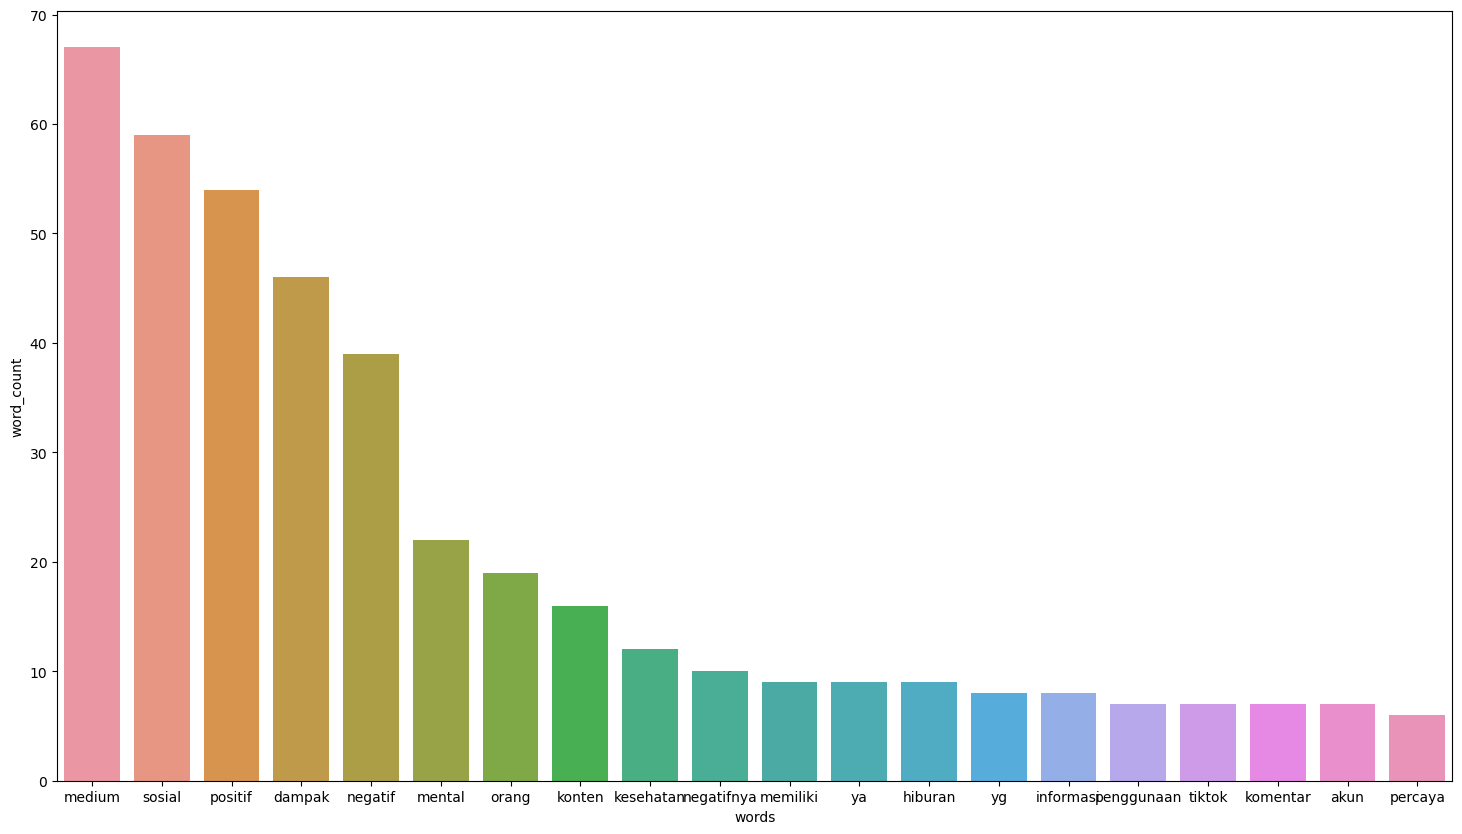

In [62]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan hasil perhitungan frekuensi dari sudah dilemmatisasi yang ditampilkan dalam DataFrame lalu divisualisasikan dalam bentuk barplot dapat disimpulkan bahwa kata sifat yang sering muncul adalah kata "app" yaitu sebanyak 17.984 kali dan kata sering muncul kedua adalah kata "good" dengan muncul sebanyak 8.075 kali. Sedangkan kata sifat yang jarang atau sedikit muncul adalah kata "apps" sebanyak < 2.500 kali.

In [64]:
reviews_data[['C','reviews_cleaned_lemmatized',"reviews_cleaned"]].to_csv("C:/Users/hp/Downloads/cleaned_reviews_lemmatized_data.csv",index = False)

# Analyzing N-grams

N-gram adalah barisan kontinu dari n item teks tertentu. N adalah singkatan dari nilai numerik positif, mulai dari 1 hingga n . N-gram yang paling umum adalah unigram, bigram, dan trigram, dengan n masing-masing adalah 1, 2, dan 3. N-gram digunakan untuk mengekstrak informasi berguna tentang distribusi kata, suku kata, atau huruf dalam teks sehingga mampu mengidentifikasi kata, suku kata, atau frasa paling umum dalam data.

In [65]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...


In [66]:
reviews_data.shape

(55, 3)

In [67]:
reviews_data = reviews_data.dropna()

In [68]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

* **Mengekstrak N-grams**

In [69]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

Untuk mengekstrak n-gram dari data teks diperlukan fungsi ngrams di nltk untuk mengambil data yang telah di-tokenisasi dan menghasilkan n-gram dari panjang tertentu, di mana setiap n-gram direpresentasikan sebagai satu string dengan kata-kata yang digabungkan oleh spasi. 

In [70]:
reviews_data['reviews_ngrams'] = reviews_data['reviews_tokenized'].apply(lambda x: extract_ngrams(x, 2))
reviews_data.head()

,C,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_ngrams
0,positif karena di sosial media saya dapat mene...,positif karena di sosial media saya dapat mene...,positif sosial media menemukan hiburan membang...,"[positif, sosial, media, menemukan, hiburan, m...","[positif sosial, sosial media, media menemukan..."
1,semua kegiatan dan hal pasti memiliki dampak p...,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,"[kegiatan, memiliki, dampak, positif, negatif,...","[kegiatan memiliki, memiliki dampak, dampak po..."
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial bisa memiliki dampak y...,penggunaan media sosial memiliki dampak positi...,"[penggunaan, media, sosial, memiliki, dampak, ...","[penggunaan media, media sosial, sosial memili..."
3,Yang namanya social media pasti memiliki dampa...,yang namanya social media pasti memiliki dampa...,namanya social media memiliki dampak positif n...,"[namanya, social, media, memiliki, dampak, pos...","[namanya social, social media, media memiliki,..."
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dapat memberikan dampa...,penggunaan media sosial dampak positif kesehat...,"[penggunaan, media, sosial, dampak, positif, k...","[penggunaan media, media sosial, sosial dampak..."


Jadi setelah proses ekstraksi dihasikan kolom baru yaitu 'review_ngrams' yang berisi n-gram (pasangan kata) dari setiap baris data yang telah di-tokenisasi. Dengan menentukan panjang n-gram sebagai 2, menghasilkan bigram dari teks. 

In [71]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [72]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:10]

In [73]:
reviews = reviews_data['reviews_ngrams']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['positif sosial',
 'sosial media',
 'media menemukan',
 'menemukan hiburan',
 'hiburan membangkitkan',
 'membangkitkan semangat',
 'semangat merubah',
 'merubah mood',
 'kegiatan memiliki',
 'memiliki dampak']

In [74]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head(5)

,words,word_count
16,media sosial,42
10,dampak positif,22
1,sosial media,16
49,dampak negatif,14
65,kesehatan mental,12


Semua step di atas (dari def combine) merupakan proses menggabungkan kata-kata dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada argumen reviews_words. Selanjutnya dengan menggunakan fungsi 'count_topwords' untuk menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasannya sama kek awal tadi

<AxesSubplot:xlabel='words', ylabel='word_count'>

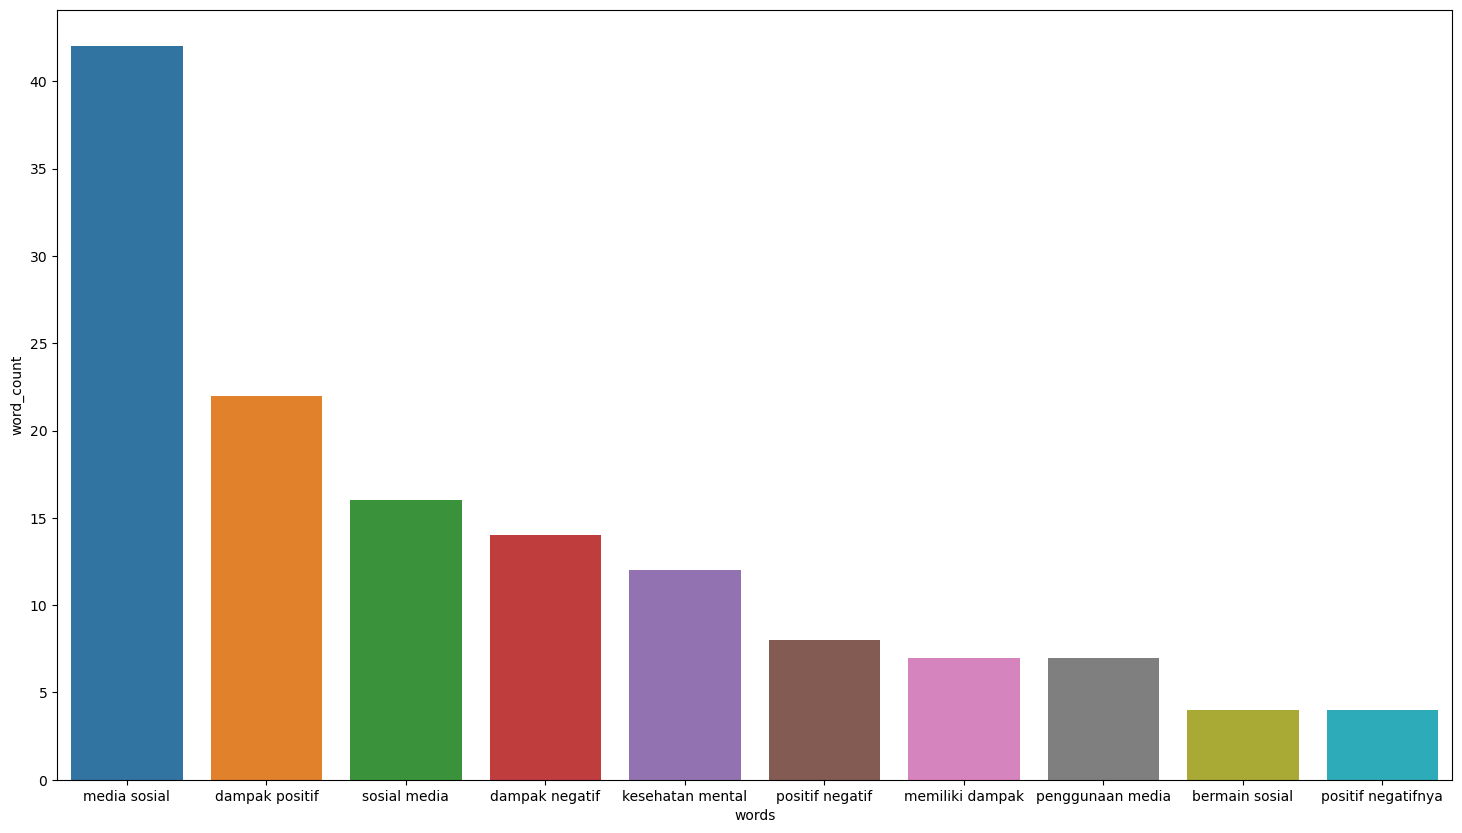

In [75]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan hasil perhitungan frekuensi ynag telah di n-gram kan lalu divisualisasikan dalam bentuk barplot dapat disimpulkan bahwa kata yang sering muncul adalah kata "mcdonald's" yaitu sebanyak 1.499 kali dan kata sering muncul kedua adalah kata "worst app" dengan muncul sebanyak 9997 kali. Sedangkan kata  yang jarang atau sedikit muncul adalah kata "open app" sebanyak < 400 kali.

# Creating Word Clouds

In [76]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_lemmatized_data.csv")
reviews_data.head()

,C,reviews_cleaned_lemmatized,reviews_cleaned
0,positif karena di sosial media saya dapat mene...,positif sosial medium menemukan hiburan memban...,positif karena di sosial media saya dapat mene...
1,semua kegiatan dan hal pasti memiliki dampak p...,kegiatan memiliki dampak positif negatif nya m...,semua kegiatan dan hal pasti memiliki dampak p...
2,Penggunaan media sosial bisa memiliki dampak y...,penggunaan medium sosial memiliki dampak posit...,penggunaan media sosial bisa memiliki dampak y...
3,Yang namanya social media pasti memiliki dampa...,namanya social medium memiliki dampak positif ...,yang namanya social media pasti memiliki dampa...
4,Penggunaan media sosial dapat memberikan dampa...,penggunaan medium sosial dampak positif keseha...,penggunaan media sosial dapat memberikan dampa...


In [77]:
reviews_data.shape

(55, 3)

In [78]:
reviews_data = reviews_data.dropna()

In [79]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_lemmatized'].apply(word_tokenize)

In [80]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [81]:
reviews = reviews_data['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['positif',
 'sosial',
 'medium',
 'menemukan',
 'hiburan',
 'membangkitkan',
 'semangat',
 'merubah',
 'mood',
 'kegiatan']

Proses menggabungkan kata-kata dari review yang telah dibersihkan, dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada argumen reviews_words. 

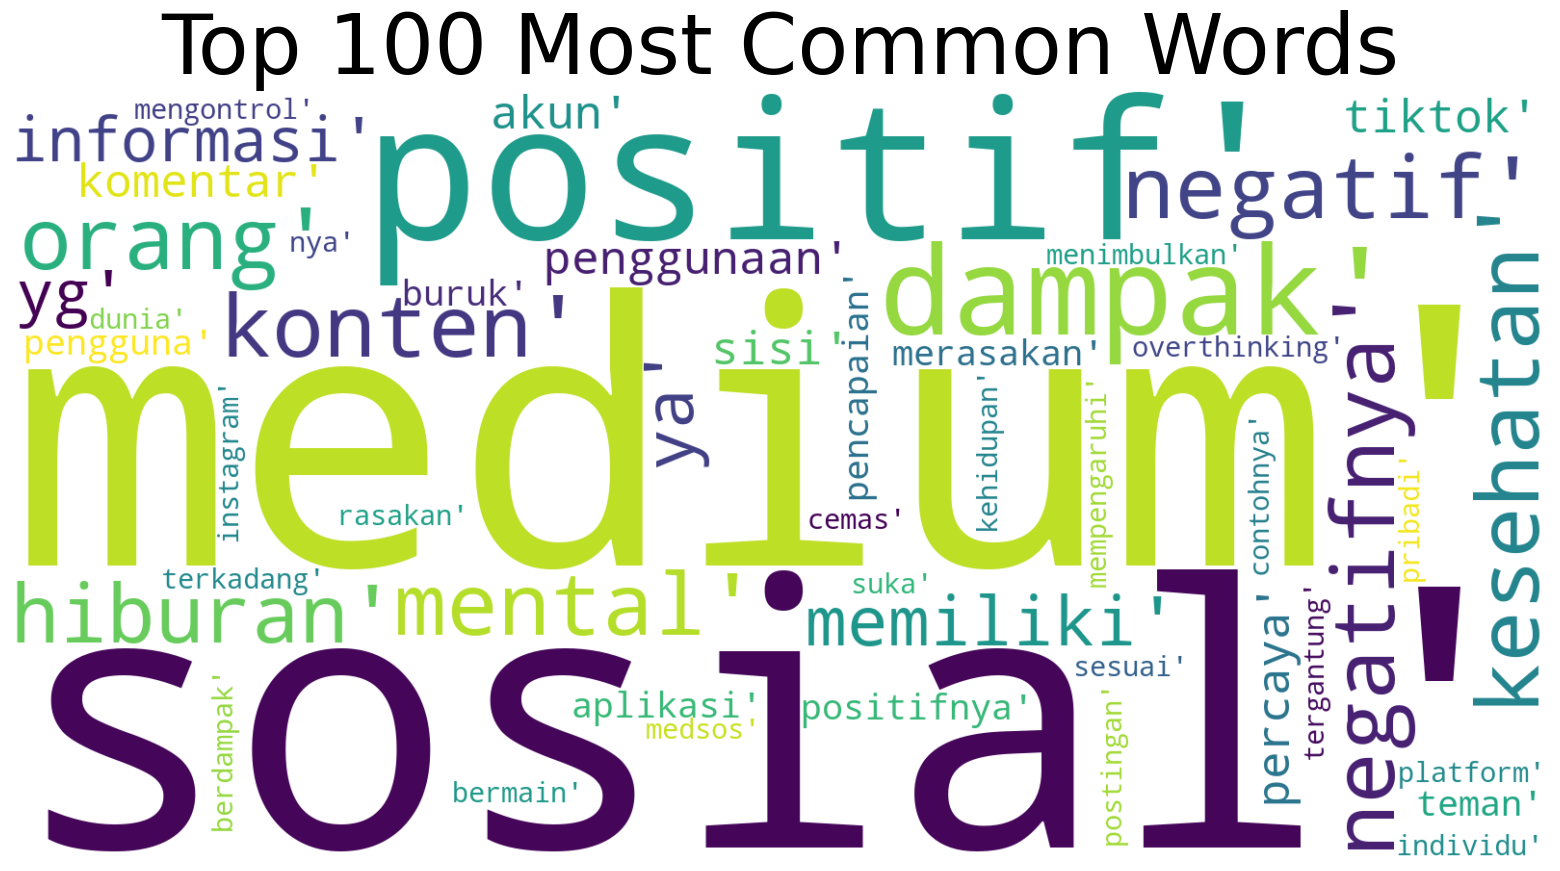

In [82]:
mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(40,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=60)
plt.show()

Hasil akhirnya adalah word cloud  menampilkan 50 kata paling umum dalam data review, dimana ukuran kata-kata merepresentasikan frekuensinya, sehinggga memberikan representasi visual yang cepat tentang kata-kata yang paling sering muncul dalam data tersebut. Berdasarkan visualisi di atas disimpulkan bahwa kata "good", "bad", dan "app" menjadi kata yang sering muncul karena memiliki nilai frekuensi tinggi sehingga ukuran ketiga pali besar atau domnan daripada kata=kata lainnya.

* **Mencari kata yang memiliki hubungan dengan pro israel**  

In [ ]:
most_word_reviews_data = reviews_data[['content', 'score']]
reviews_data[reviews_data['content'].str.contains('terrorist')]

In [ ]:
most_word_reviews_data = reviews_data[['content', 'score']]
reviews_data[reviews_data['content'].str.contains('boycot')]

In [ ]:
most_word_reviews_data = reviews_data[['content', 'score']]
reviews_data[reviews_data['content'].str.contains('israel')]

Dari kedua kode di atas kita dapat mencari kata yang memiliki hubungan pada kata 'terrorist', 'boycot', dan 'israel' sehingga bisa dilihat jika ternyata orang luar negeri juga kurang setuju dikarenakan Mcdonals merupakan perusahaan pro israel. Bisa dilihat dari komentar atau riview kata 'terrorist' memiliki paling banyak sering muncul yaitu terdapat 112 baris yang mengatakan jika Mcd merupakan salah satu perusahaan yang pro terhadap israel.